# Eksploracyjna analiza danych - na przykładzie danych z siłowni

## Wprowadzenie
Na jaki zbiór danych patrzysz? Gdzie/jak został utworzony? Jakie pytania będą zadawane?
1. Jaki Workout_Type najczęsciej jest wybierany
2. Jaki Workout_Type spala najwięcej kalorii/h
3. Jaki Workout_Type wybierają ludzie 
4. Średnie tętno a liczba sesji treningowych w tygodniu 
5. Dzienne spożycie wody a rodzaj wykonywanego treningu

Hipoteza zerowa:
Hipoteza alternatywna:

Import bibliotek użytych w projekcie oraz danych do analizy:

In [105]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from correlation import mutual_info_numeric_cat, cramers_v_matrix, pearson_corr_numeric,spearman_corr_numeric

path = Path.cwd() / 'silownia_new.csv'
df = pd.read_csv(path)

In [24]:
print(df.head())

    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   NaN    Male         88.3        1.71      180      157           60   
1  46.0  Female         74.9        1.53      179      151           66   
2  32.0  Female         68.1        1.66      167      122           54   
3  25.0    Male         53.2        1.70      190      164           56   
4  38.0    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69             1313         Yoga            12.6   
1                      1.30              883          NaN            33.9   
2                      1.11              677       Cardio            33.4   
3                      0.59              532     Strength            28.8   
4                      0.64              556     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0        

In [25]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [106]:
print(df.describe(include=[np.number]))

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  873.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.626575    73.854676     1.72258  179.883864  143.766701   
std     12.273464    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     39.000000    70.000000     1.71000  180.000000  143.000000   
75%     50.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

## Czyszczenie i porządkowanie danych
Nasze dane posiadają 973 obserwacje i 15 kolumn.
Braki w danych są w kolumnach ['Age', 'Workout_Type', 'BMI']. 
Kolumnę BMI możemy obliczyć na podstawie wysokości i wagi. 
Problemem pozostał kolumny ['Age', 'Workout_Type']. Jest to 150 obserwacji 'Age' + 100 obserwacji 'Workout_Type'. 
Tylko w 14 obserwacjach pokrywa się brak 'Age' i 'Workout_type', co da nam 150+100-14=236 obserwacji z brakiem danych

##### Sprawdzanie kolumn z `nan`
Sprawdzamy konkretne *kolumny*, które mają wartości `nan`.  

In [107]:
print(df.shape)
print(df.duplicated().sum())

(973, 15)
0


In [108]:
nulls = df.isnull().sum()
print(nulls[nulls != 0].index.tolist())
print(nulls)
print(df[nulls[nulls != 0].index.tolist()].describe())


['Age', 'Workout_Type', 'BMI']
Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64
              Age         BMI
count  873.000000  823.000000
mean    38.626575   24.816549
std     12.273464    6.600485
min     18.000000   12.320000
25%     28.000000   20.105000
50%     39.000000   23.940000
75%     50.000000   28.450000
max     59.000000   47.720000


In [109]:
x=df[df['Age'].isna()]
y=x[x['Workout_Type'].isna()]
y.shape


(14, 15)

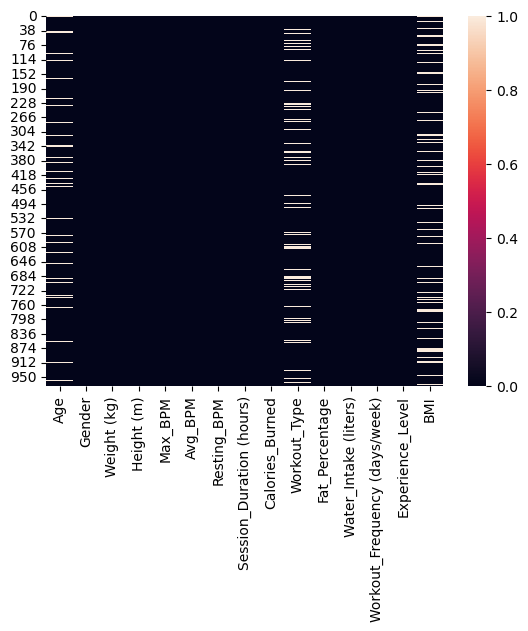

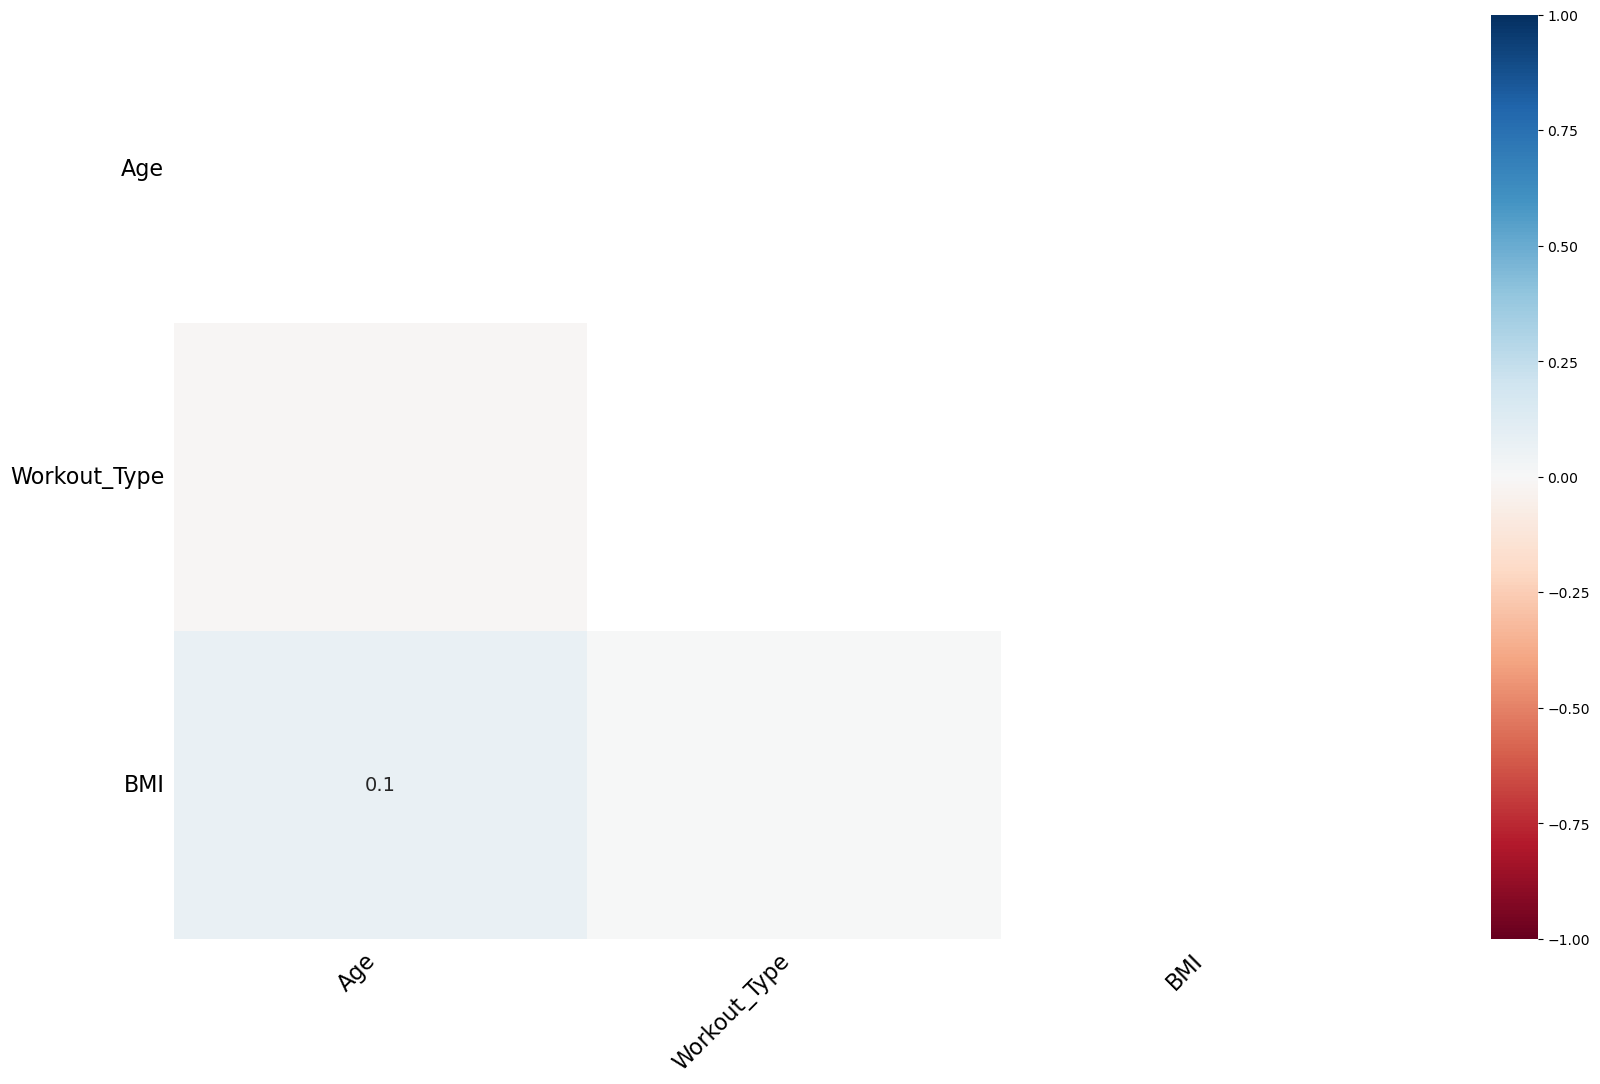

In [30]:
sns.heatmap(df.isna());

#alternatywnie
import missingno as msno
msno.heatmap(df);

In [110]:
print(df['Age'].unique())
print(df['Workout_Type'].unique())
print(df['BMI'].unique())

[nan 46. 32. 25. 38. 56. 36. 40. 28. 41. 53. 57. 20. 39. 19. 47. 55. 50.
 42. 44. 59. 45. 33. 54. 24. 26. 35. 21. 52. 31. 34. 23. 43. 51. 27. 48.
 58. 18. 22. 29. 30. 49. 37.]
['Yoga' nan 'Cardio' 'Strength' 'HIIT']
[  nan 32.   18.41 14.39 20.55 23.76 30.57 32.34 30.07 43.31 17.89 43.4
 23.62 13.88 27.34 13.98 21.81 26.96 28.41 22.95 25.16 22.51 21.78 20.12
 17.6  24.54 27.64 33.4  25.83 27.84 42.63 24.37 33.14 19.11 17.77 21.4
 17.3  33.8  23.93 40.1  15.31 23.17 20.42 33.61 34.18 22.78 44.84 28.35
 21.77 20.86 16.99 22.45 16.86 32.93 17.11 22.28 25.89 33.55 19.72 39.12
 27.7  15.24 21.88 16.76 18.15 33.16 24.72 17.27 19.65 23.53 28.87 21.53
 19.42 29.71 22.89 29.61 29.53 27.85 22.31 30.3  22.15 37.56 18.76 15.7
 22.61 34.5  18.12 17.54 18.66 23.09 31.41 29.87 21.64 25.68 23.52 23.74
 16.52 20.88 30.52 26.65 24.16 29.26 30.54 29.95 21.41 17.88 34.24 22.43
 22.64 24.5  24.55 26.86 22.08 24.75 30.18 31.61 19.63 23.05 27.93 23.59
 13.23 28.97 26.1  20.06 38.78 16.04 12.47 27.01 22.69 39

Funkcja mapy cieplnej pokazuje, że nie ma silnych korelacji między brakującymi wartościami różnych cech. To dobrze; niskie korelacje wskazują ponadto, że dane są MAR.

Uzupełnijmy teraz brakujące dane dla kolumny z BMI:

In [32]:
BMI_braki = df['BMI'].isnull()
df.loc[BMI_braki, 'BMI'] = df.loc[BMI_braki, 'Weight (kg)'] / (df.loc[BMI_braki, 'Height (m)'] ** 2)
print(df.isnull()["BMI"].sum())


0


Zobaczmy macierz korelacji dla wszystkich zmiennych liczbowych. Pomoże nam to zdecydować, co zrobić z pozostałymi brakami.  

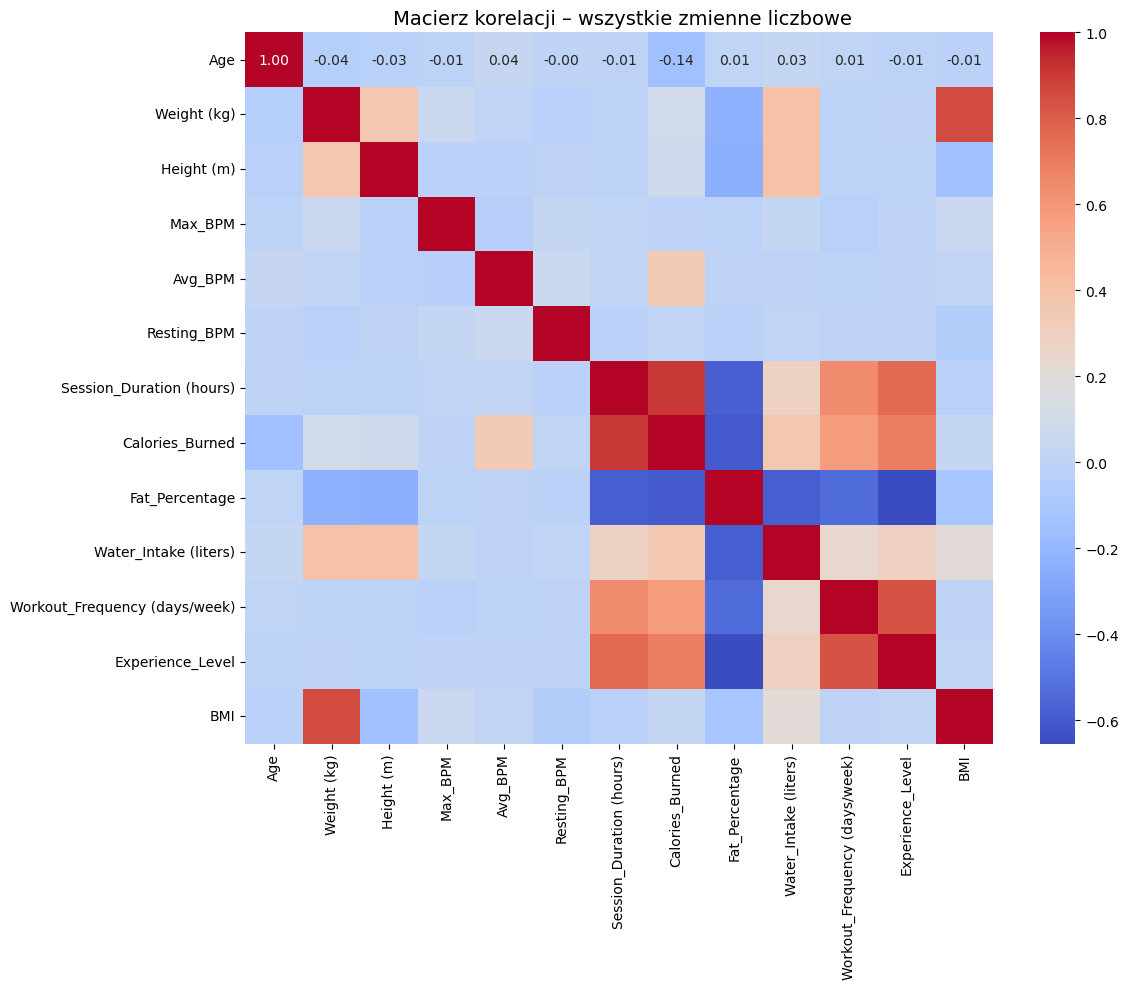

In [130]:
#korelacje z weikiem
kor_matrix= df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(kor_matrix, annot=True, cmap="coolwarm",fmt=".2f")
plt.title(" Macierz korelacji – wszystkie zmienne liczbowe", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Imputacja wielokrotna dla braków:

In [111]:
from imputer import impute_with_mice
df_imputed = impute_with_mice(df, iterations=5)
df_imputed

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,Experience_Level,BMI
0,39.0,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,31.41
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.76
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24.0,Male,87.1,1.74,187,158,67,1.57,1364,Strength,10.0,3.5,4,3,28.77
969,25.0,Male,66.6,1.61,184,166,56,1.38,1260,Strength,25.0,3.0,2,1,25.85
970,49.0,Female,60.4,1.76,194,120,53,1.72,929,Cardio,18.8,2.7,5,3,18.29
971,32.0,Male,126.4,1.83,198,146,62,1.10,883,Yoga,28.2,2.1,3,2,37.74


Porównujemy rozkład danych dla danych przed i po imputacji:


In [48]:
import plotly.graph_objects as go

fig = go.Figure()

# Histogram Age PRZED imputacją
fig.add_trace(go.Histogram(
    x=df['Age'],
    name='Przed imputacją',
    marker_color='#e74c3c',
    opacity=0.6
))

# Histogram Age PO imputacji
fig.add_trace(go.Histogram(
    x=df_imputed['Age'],
    name='Po imputacji',
    marker_color='#2ecc71',
    opacity=0.6
))

# Ustawienia: nałożenie słupków
fig.update_layout(
    barmode='overlay',
    title='Porównanie rozkładu Age – przed i po imputacji',
    title_x=0.5,
    title_font_size=20,
    xaxis_title='Age',
    yaxis_title='Liczba obserwacji',
    template='plotly_white'
)

fig.show()


In [49]:
import plotly.graph_objects as go

fig = go.Figure()

# Histogram Workout_Type PRZED imputacją
fig.add_trace(go.Histogram(
    x=df['Workout_Type'],
    name='Przed imputacją',
    marker_color='#e74c3c',
    opacity=0.6
))

# Histogram Workout_Type PO imputacji
fig.add_trace(go.Histogram(
    x=df_imputed['Workout_Type'],
    name='Po imputacji',
    marker_color='#2ecc71',
    opacity=0.6
))

# Ustawienia: nałożenie słupków
fig.update_layout(
    barmode='overlay',
    title='Porównanie rozkładu Workout_Type – przed i po imputacji',
    title_x=0.5,
    title_font_size=20,
    xaxis_title='Workout_Type',
    yaxis_title='Liczba obserwacji',
    template='plotly_white'
)

fig.show()


### Analiza wartości odstających:
W kolumnach "Weight_kg", "Calories_burned" i "BMI" zaobserwowano występowanie outlierów. Ich obecność wydaje się być realna- nie stwierdzono błędów w danych. 


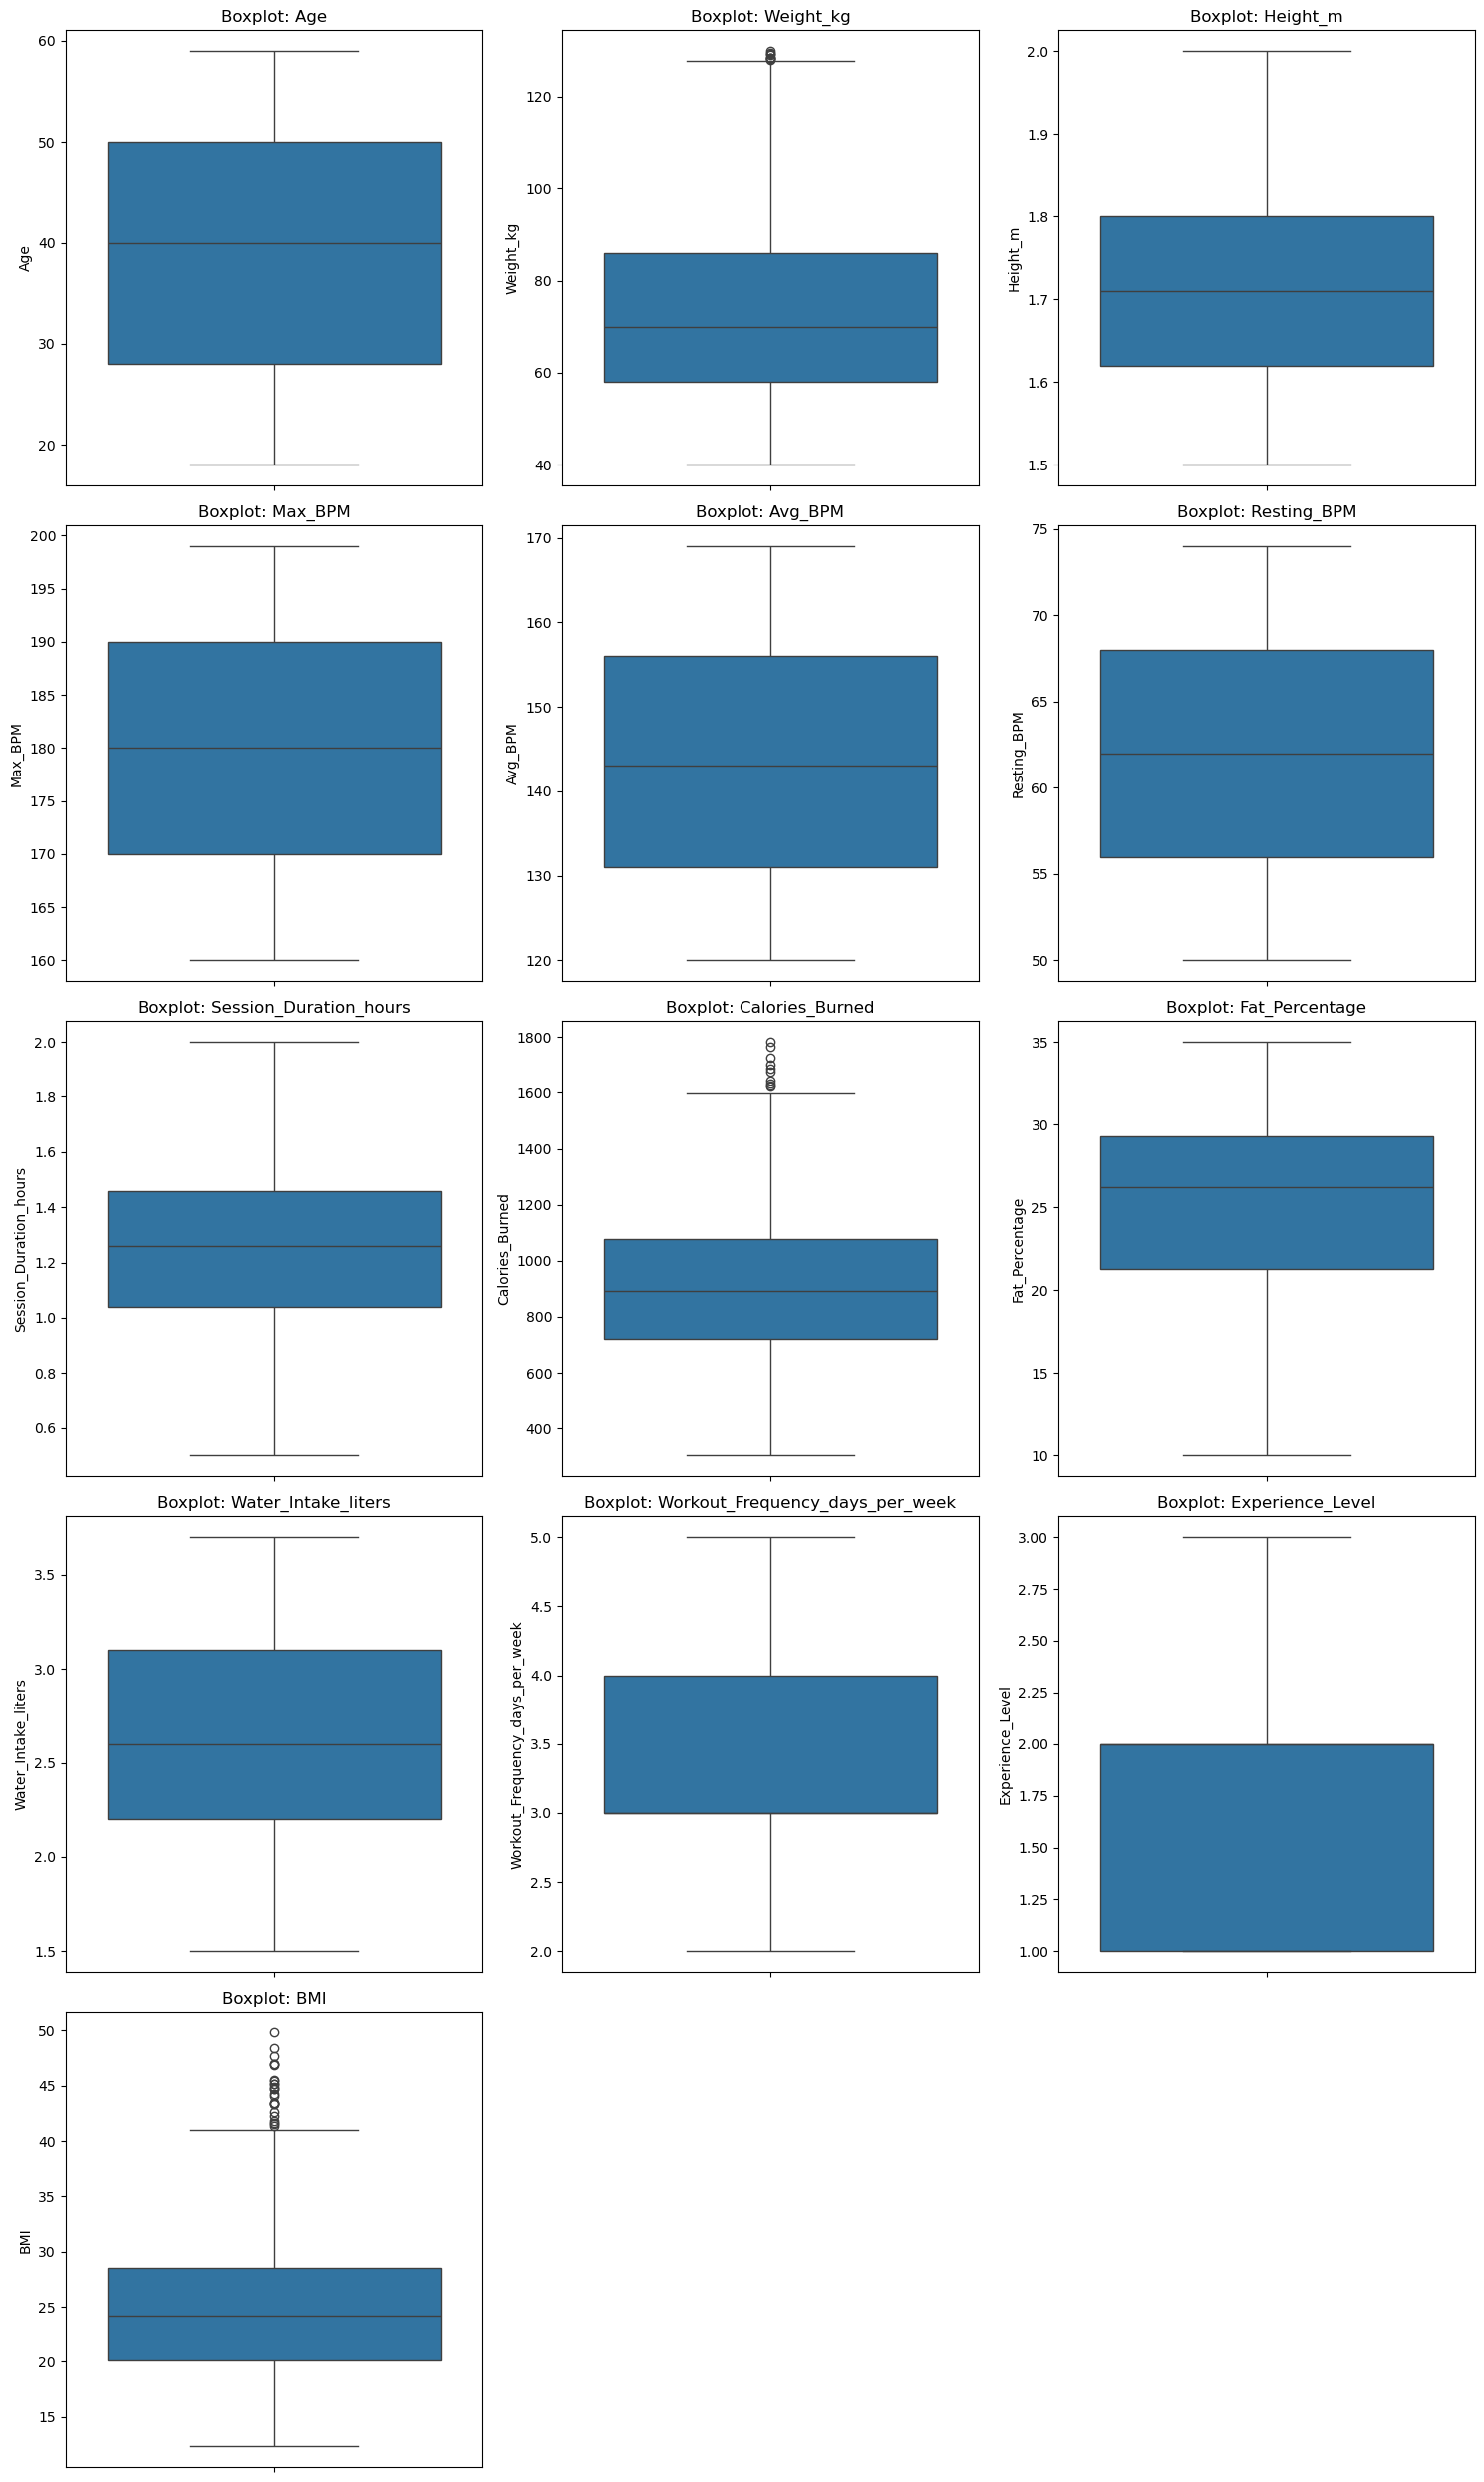

In [58]:
numeric_cols = df_imputed.select_dtypes(include=['number']).columns

# Rozmiar siatki wykresów
plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 2) // 3)))

# Tworzenie boxplotów
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(data=df_imputed[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.show()

### Wizualizacje

4-5 wykresów przedstawiających określone wzorce lub cechy, które chcesz podkreślić. Każdej wizualizacji powinien towarzyszyć krótki (1-2 zdania) opis tego, co według Ciebie pokazuje.	
np. Boxplot pokazujący ceny nieruchomości według miast lub innych charakterystyk - przekroje. Wykres słupkowy pokazujący proporcję mieszkań o róznym standardzie wykończenia.

Z poniższych wykresów możemy wywnioskować, że istnieje zależność liniowa między procentem tłuszczu w organizmie a ilością spalanych kalorii. Osoby z większą tkanką tłuszczową spalaja mniej kcal. 
Wszystkie osoby mające tkankę tłuszczową w zakresie 10-15% piją 3,5 l wody dziennie.

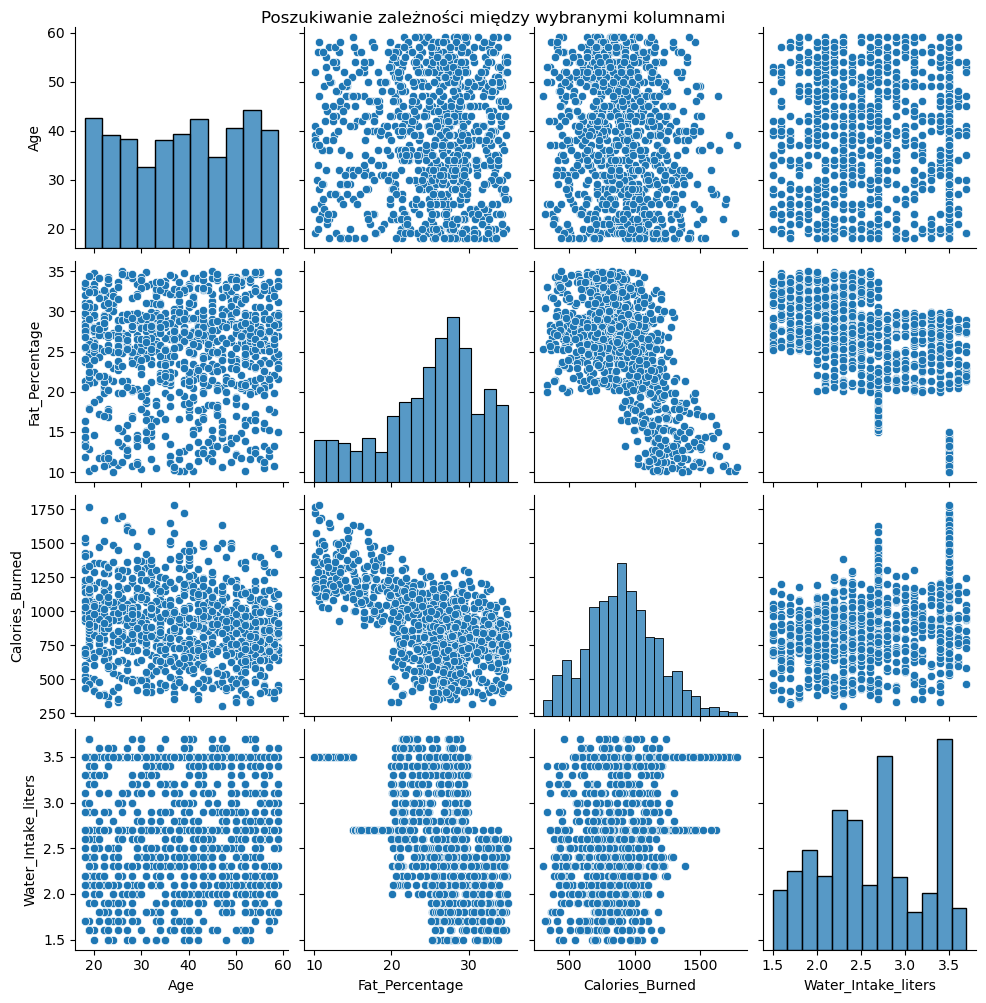

In [72]:
sns.pairplot(df_imputed, vars=['Age', 'Fat_Percentage', 'Calories_Burned', 'Water_Intake_liters'])
plt.suptitle("Poszukiwanie zależności między wybranymi kolumnami", y=1)
plt.show()

In [71]:
fig = px.scatter(
    df_imputed,
    x='BMI',
    y='Fat_Percentage',
    # size='Calories_Burned',
    color='Gender',
    opacity=0.7,
    title='BMI a procent tkanki tłuszczowej',
    size_max=60
)

fig.update_traces(textposition='middle center')
fig.show()


Kobiety w wieku około 50 lat preferują HIIT (High Intensity Interval Training),
Strenght i Yoga jest porównywalnie popularny w grupach kobiet  20-30 oraz 40-50.
Cardio jest popularne zwłaszcza u kobiet w wieku 30-40


Męzczyźni w wieku około 40 lat wybierają najczęściej ćwiczenia Cardio.
W wieku 40-50 lat wzrasta, (wraca :D ) zainteresowanie Strength jak i Jogą.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

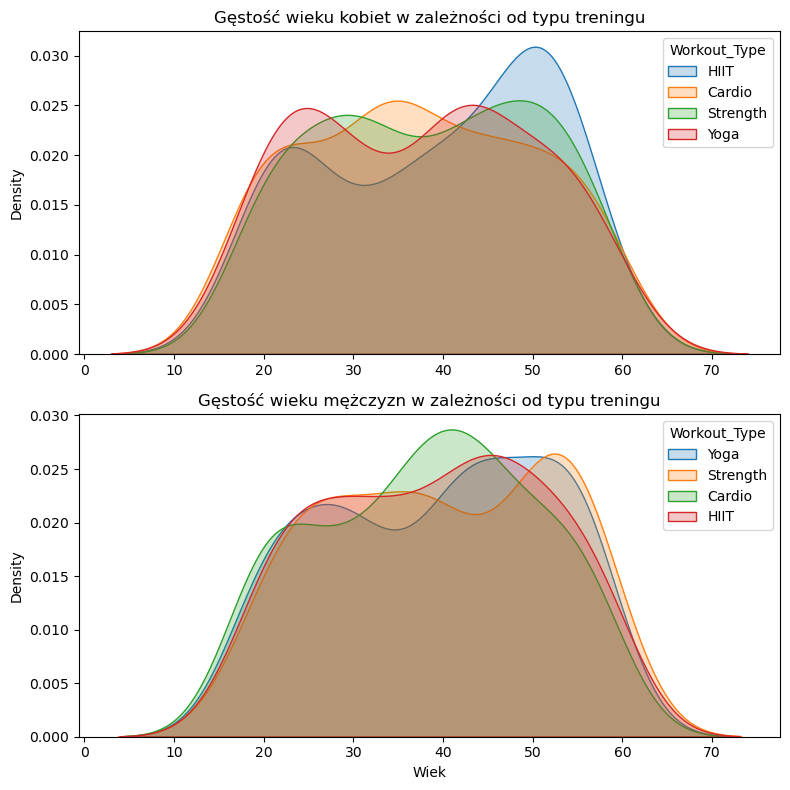

In [145]:

# Dane
female_data = df_imputed[df_imputed['Gender'] == 'Female']
male_data = df_imputed[df_imputed['Gender'] == 'Male']

# Tworzymy figurę z 2 wykresami (jeden pod drugim)
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# 1. Wykres dla kobiet
for wt in female_data['Workout_Type'].dropna().unique():
    sns.kdeplot(
        female_data[female_data['Workout_Type'] == wt]['Age'],
        label=wt,
        fill=True,
        ax=axes[0]
    )
axes[0].set_title("Gęstość wieku kobiet w zależności od typu treningu")
axes[0].set_xlabel("Wiek")
axes[0].legend(title='Workout_Type')
axes[0].tick_params(labelbottom=True)

# 2. Wykres dla mężczyzn
for wt in male_data['Workout_Type'].dropna().unique():
    sns.kdeplot(
        male_data[male_data['Workout_Type'] == wt]['Age'],
        label=wt,
        fill=True,
        ax=axes[1]
    )
axes[1].set_title("Gęstość wieku mężczyzn w zależności od typu treningu")
axes[1].set_xlabel("Wiek")
axes[1].legend(title='Workout_Type')

plt.tight_layout()
plt.show()


In [146]:
grouped_stats = df_imputed.groupby(['Gender', 'Workout_Type'])['Age'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)
).reset_index()

# Zaokrąglamy dla czytelności
grouped_stats = grouped_stats.round(2)

# Wyświetlenie
print(grouped_stats)

   Gender Workout_Type  count   mean  median    std   min   max     q1     q3  \
0  Female       Cardio    131  37.44    37.0  12.56  18.0  59.0  26.50  47.50   
1  Female         HIIT    104  39.44    41.0  12.49  19.0  58.0  26.00  50.00   
2  Female     Strength    130  38.41    39.0  12.18  18.0  59.0  28.00  49.75   
3  Female         Yoga     97  37.44    39.0  12.50  18.0  59.0  25.00  47.00   
4    Male       Cardio    129  38.16    39.0  11.94  18.0  59.0  28.00  48.00   
5    Male         HIIT    115  39.03    40.0  12.09  18.0  59.0  29.00  49.00   
6    Male     Strength    125  39.80    39.0  12.48  18.0  59.0  29.00  52.00   
7    Male         Yoga    142  39.36    41.0  12.41  18.0  59.0  28.25  50.00   

     iqr  
0  21.00  
1  24.00  
2  21.75  
3  22.00  
4  20.00  
5  20.00  
6  23.00  
7  21.75  


In [73]:
df_imputed.dtypes

Age                                float64
Gender                              object
Weight_kg                          float64
Height_m                           float64
Max_BPM                              int64
Avg_BPM                              int64
Resting_BPM                          int64
Session_Duration_hours             float64
Calories_Burned                      int64
Workout_Type                        object
Fat_Percentage                     float64
Water_Intake_liters                float64
Workout_Frequency_days_per_week      int64
Experience_Level                     int64
BMI                                float64
dtype: object

Poniższy wykres Gęstości BMI w zależnosci od płci pokazuje, że BMI kobiet chodzących na siłownie jest silnie skupione (std = 4.4) wokół mediany = 22.875.
BMI mężczyzn jest mniej skupione (std = 7.6) wokół mediany  26.220 .

Ujemne Kurdozy wskazują na Krzywa platykurtyczna rozkladu BMI dla obu płci.
W porównaniu do rozkładu normalnego, ich  centralny szczyt jest niższy i szerszy, a jego ogony są krótsze i cieńsze.

Dla mężczyzn (Male), kurtoza = -0.27
Dla kobiet (Female), kurtoza = -0.50


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



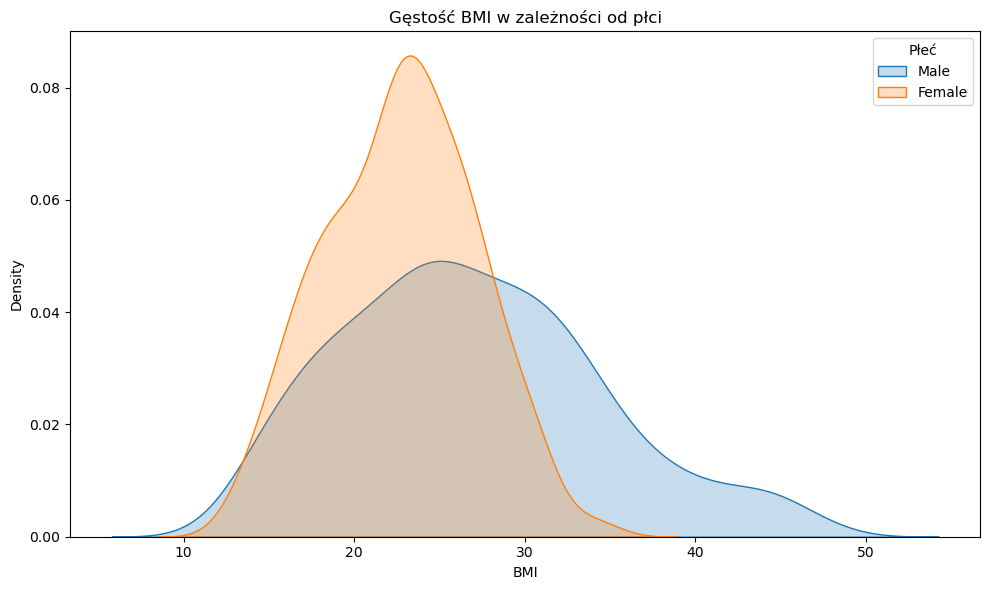

In [99]:

plt.figure(figsize=(10, 6))
for wt in df_imputed['Gender'].dropna().unique():
    sns.kdeplot(df_imputed[df_imputed['Gender'] == wt]["BMI"], label=wt, fill=True)

plt.title("Gęstość BMI w zależności od płci")
plt.xlabel("BMI")
plt.legend(title='Płeć')
plt.tight_layout()
plt.show()

In [80]:
group_stats = df_imputed.groupby('Gender')['BMI'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(group_stats)

        count       mean  median       std    min    max
Gender                                                  
Female    462  22.731732  22.875  4.428829  12.47  35.04
Male      511  26.864462  26.220  7.597036  12.32  47.72


In [88]:
from scipy.stats import kurtosis

for gender in df_imputed['Gender'].dropna().unique():
    bmi_values = df_imputed[df_imputed['Gender'] == gender]['BMI'].dropna()
    k = kurtosis(bmi_values, fisher=True)
    print(f"Kurtoza BMI dla płci {gender}: {k:.2f}")

Kurtoza BMI dla płci Male: -0.27
Kurtoza BMI dla płci Female: -0.50


# Analiza korelacji
Korelacja Pearsona między zmiennymi ciągłymi

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



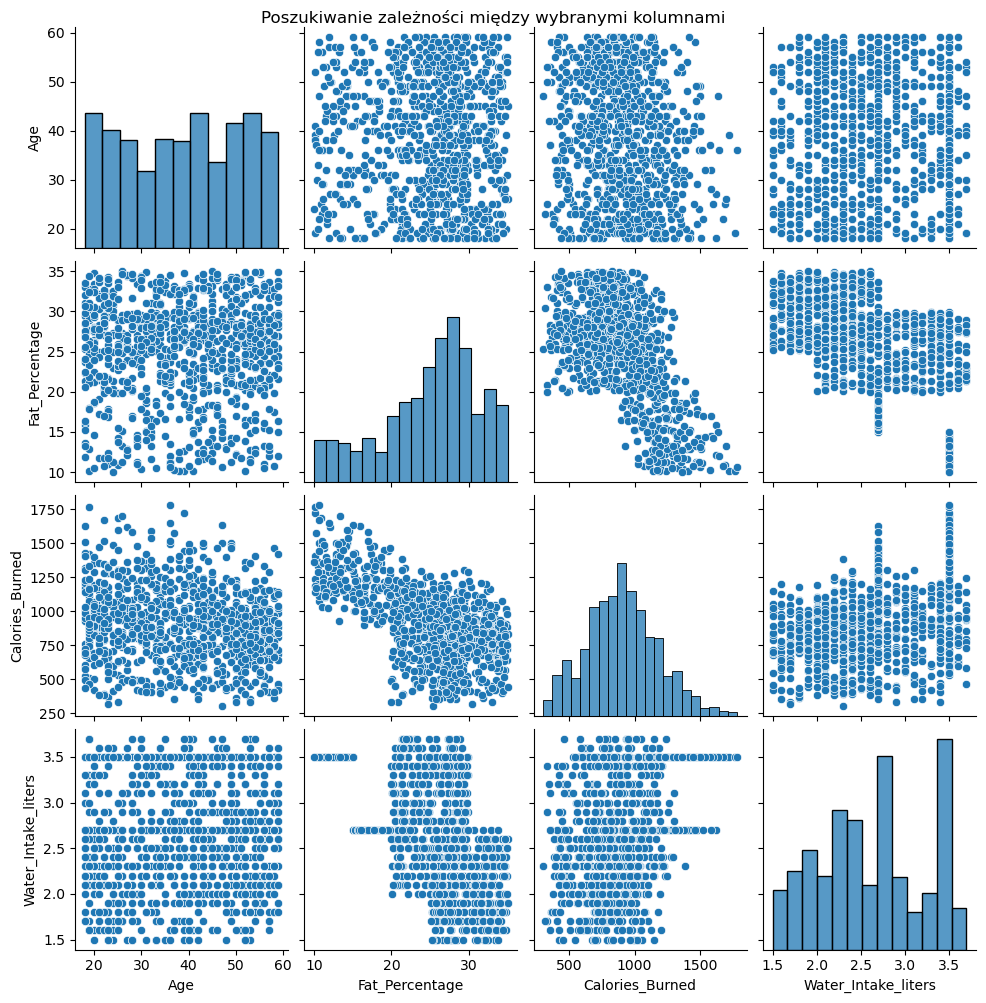

In [131]:
sns.pairplot(df_imputed, vars=['Age', 'Fat_Percentage', 'Calories_Burned', 'Water_Intake_liters'])
plt.suptitle("Poszukiwanie zależności między wybranymi kolumnami", y=1)
plt.show()

Macierz Cramér’s V dla zmiennych kategorycznych:
                Gender  Workout_Type
Gender        1.000000      0.061572
Workout_Type  0.061572      1.000000


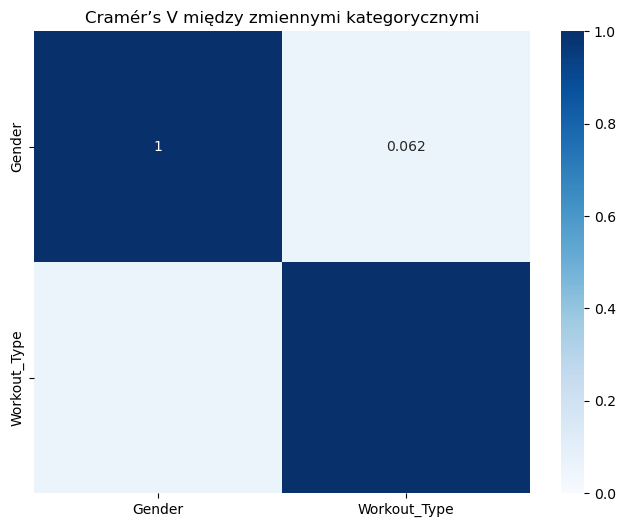

,Gender,Workout_Type
Gender,1.000000,0.061572
Workout_Type,0.061572,1.000000


In [116]:
cramers_v_matrix(df_imputed, ['Gender', 'Workout_Type'])


In [117]:
mutual_info_numeric_cat(df_imputed, 'Workout_Type')

Informacja wzajemna między numerycznymi a 'Workout_Type':
Height_m                           0.049857
Fat_Percentage                     0.019973
Water_Intake_liters                0.019564
Workout_Frequency_days_per_week    0.011618
Weight_kg                          0.009746
Resting_BPM                        0.009704
BMI                                0.001687
Experience_Level                   0.001317
Age                                0.000000
Max_BPM                            0.000000
Avg_BPM                            0.000000
Session_Duration_hours             0.000000
Calories_Burned                    0.000000
dtype: float64


Height_m                           0.049857
Fat_Percentage                     0.019973
Water_Intake_liters                0.019564
Workout_Frequency_days_per_week    0.011618
Weight_kg                          0.009746
Resting_BPM                        0.009704
BMI                                0.001687
Experience_Level                   0.001317
Age                                0.000000
Max_BPM                            0.000000
Avg_BPM                            0.000000
Session_Duration_hours             0.000000
Calories_Burned                    0.000000
dtype: float64

Korelacje Spearmana (numeryczne):
                                      Age  Weight_kg  Height_m   Max_BPM  \
Age                              1.000000  -0.013239 -0.017872 -0.001650   
Weight_kg                       -0.013239   1.000000  0.364047  0.054865   
Height_m                        -0.017872   0.364047  1.000000 -0.017402   
Max_BPM                         -0.001650   0.054865 -0.017402  1.000000   
Avg_BPM                          0.043438   0.003356 -0.007860 -0.038094   
Resting_BPM                      0.012750  -0.035458 -0.000610  0.037059   
Session_Duration_hours          -0.017563   0.036810 -0.005961  0.002922   
Calories_Burned                 -0.148365   0.131960  0.075132 -0.007546   
Fat_Percentage                  -0.012747  -0.277304 -0.250245 -0.011019   
Water_Intake_liters              0.059436   0.410516  0.384055  0.030218   
Workout_Frequency_days_per_week  0.002484   0.039355 -0.012467 -0.032804   
Experience_Level                -0.014529   0.058944 -

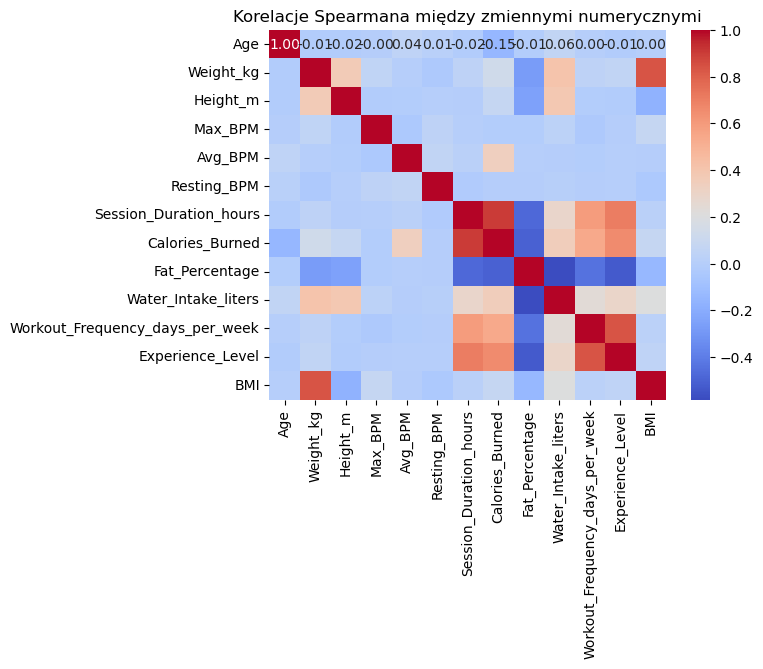

,Age,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,Experience_Level,BMI
Age,1.000000,-0.013239,-0.017872,-0.001650,0.043438,0.012750,-0.017563,-0.148365,-0.012747,0.059436,0.002484,-0.014529,0.001715
Weight_kg,-0.013239,1.000000,0.364047,0.054865,0.003356,-0.035458,0.036810,0.131960,-0.277304,0.410516,0.039355,0.058944,0.834254
Height_m,-0.017872,0.364047,1.000000,-0.017402,-0.007860,-0.000610,-0.005961,0.075132,-0.250245,0.384055,-0.012467,-0.013960,-0.168326
Max_BPM,-0.001650,0.054865,-0.017402,1.000000,-0.038094,0.037059,0.002922,-0.007546,-0.011019,0.030218,-0.032804,-0.001966,0.075721
Avg_BPM,0.043438,0.003356,-0.007860,-0.038094,1.000000,0.059993,0.020230,0.337286,0.001743,-0.005726,-0.008900,0.003358,-0.000781
Resting_BPM,0.012750,-0.035458,-0.000610,0.037059,0.059993,1.000000,-0.022155,-0.002602,-0.004913,0.008456,-0.006810,0.000340,-0.039673
Session_Duration_hours,-0.017563,0.036810,-0.005961,0.002922,0.020230,-0.022155,1.000000,0.903478,-0.480582,0.284856,0.595484,0.708775,0.022110
Calories_Burned,-0.148365,0.131960,0.075132,-0.007546,0.337286,-0.002602,0.903478,1.000000,-0.506367,0.345590,0.542816,0.658600,0.074440
Fat_Percentage,-0.012747,-0.277304,-0.250245,-0.011019,0.001743,-0.004913,-0.480582,-0.506367,1.000000,-0.581309,-0.443827,-0.530474,-0.138655
Water_Intake_liters,0.059436,0.410516,0.384055,0.030218,-0.005726,0.008456,0.284856,0.345590,-0.581309,1.000000,0.235997,0.292067,0.208248


In [119]:
spearman_corr_numeric(df_imputed)